# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

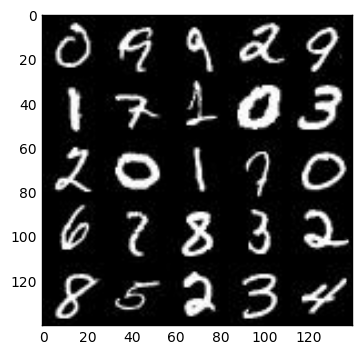

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

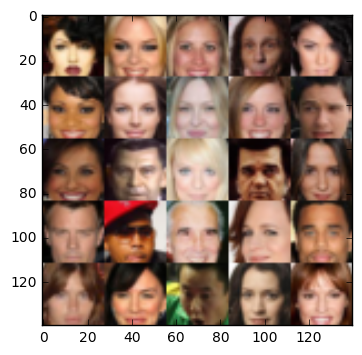

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


/home/carnd/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real=tf.placeholder(tf.float32,(None, image_width, image_height, image_channels), name='input_real')
    input_z=tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate=tf.placeholder(tf.float32, (None), name='learning_rate')

    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [23]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        #x0=tf.layers.conv2d(images, 32, 5, strides=2, padding='same')
        #relu0=tf.maximum(0.2 * x0, x0)
        
        x1=tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        #batch_norm1=tf.layers.batch_normalization(x1, training=True)
        relu1=tf.maximum(0.2 * x1, x1)
        
        x2=tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        batch_norm1=tf.layers.batch_normalization(x2, training=True)
        relu2=tf.maximum(0.2 * batch_norm1, batch_norm1)
        
        x3=tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        batch_norm2=tf.layers.batch_normalization(x3, training=True)
        relu3=tf.maximum(0.2 * batch_norm2, batch_norm2)
        
        flatten=tf.reshape(relu3,(-1, 4*4*256))
        logits=tf.layers.dense(flatten, 1)
        out=tf.sigmoid(logits)
        
        
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [24]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    alpha = 0.2
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse = not is_train):
        
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*512)
        # reshaping to start of convolutional stack
        # unflatten layer
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        
        x1 = tf.layers.batch_normalization(x1, training = is_train)
        lrelu1 = tf.maximum(alpha * x1, x1)     
        
        x2 = tf.layers.conv2d_transpose(lrelu1, filters=256, kernel_size=5, strides=1, padding='same')
        x2 = tf.layers.batch_normalization(x2, training = is_train)
        lrelu2 = tf.maximum(alpha * x2, x2)       
        
        
        x3 = tf.layers.conv2d_transpose(lrelu2, filters=128, kernel_size=5, strides=1, padding='same')
        x3 = tf.layers.batch_normalization(x3, training = is_train)
        lrelu3 = tf.maximum(alpha * x3, x3)     
        
        x31 = tf.layers.conv2d_transpose(lrelu3, filters=64, kernel_size=5, strides=2, padding='same')
        x31 = tf.layers.batch_normalization(x31, training = is_train)
        lrelu31 = tf.maximum(alpha * x31, x31)       
        
        logits = tf.layers.conv2d_transpose(inputs=lrelu31, filters=out_channel_dim, kernel_size=2, strides=2, padding='same')       
        out = tf.tanh(logits)
        
    return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [25]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss
 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [26]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
   
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [27]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [28]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                batch_images = batch_images.reshape(batch_size, data_shape[1], data_shape[2], data_shape[3])
                batch_images = batch_images* 2
                # TODO: Train Model
                steps += 1
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                 # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real : batch_images, input_z : batch_z, lr:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z : batch_z, input_real: batch_images,lr:learning_rate})
            
                if steps % 10 == 0:
                    # At the end of each 10 epochs, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images, lr:learning_rate})
                    train_loss_g = g_loss.eval({input_z: batch_z, lr:learning_rate})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                if steps % 100 == 0:
                    # At the end of each 100 epochs, show generator output
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)
                
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.2058... Generator Loss: 3.9701
Epoch 1/2... Discriminator Loss: 0.5993... Generator Loss: 7.5145
Epoch 1/2... Discriminator Loss: 0.2345... Generator Loss: 2.3131
Epoch 1/2... Discriminator Loss: 9.5715... Generator Loss: 14.8372
Epoch 1/2... Discriminator Loss: 0.3642... Generator Loss: 1.4513
Epoch 1/2... Discriminator Loss: 0.4841... Generator Loss: 1.6101
Epoch 1/2... Discriminator Loss: 2.0783... Generator Loss: 0.2791
Epoch 1/2... Discriminator Loss: 0.0802... Generator Loss: 6.4565
Epoch 1/2... Discriminator Loss: 0.3660... Generator Loss: 2.1019
Epoch 1/2... Discriminator Loss: 1.0877... Generator Loss: 1.1027


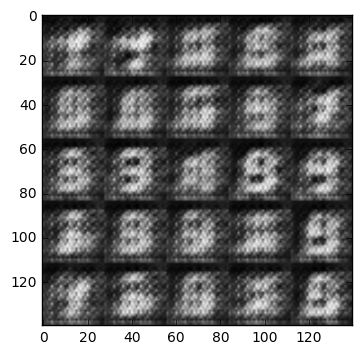

Epoch 1/2... Discriminator Loss: 1.2792... Generator Loss: 0.4269
Epoch 1/2... Discriminator Loss: 1.2337... Generator Loss: 0.4857
Epoch 1/2... Discriminator Loss: 1.2163... Generator Loss: 0.5132
Epoch 1/2... Discriminator Loss: 0.6914... Generator Loss: 1.6553
Epoch 1/2... Discriminator Loss: 0.4327... Generator Loss: 1.8887
Epoch 1/2... Discriminator Loss: 1.1971... Generator Loss: 0.6367
Epoch 1/2... Discriminator Loss: 0.7984... Generator Loss: 2.1582
Epoch 1/2... Discriminator Loss: 1.5315... Generator Loss: 3.7772
Epoch 1/2... Discriminator Loss: 1.3830... Generator Loss: 2.6032
Epoch 1/2... Discriminator Loss: 0.7025... Generator Loss: 1.4022


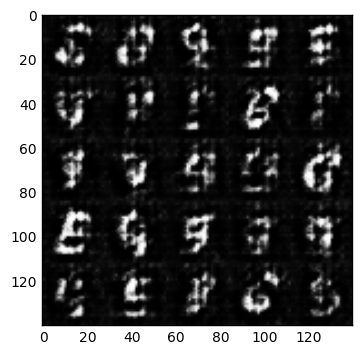

Epoch 1/2... Discriminator Loss: 0.9177... Generator Loss: 0.8274
Epoch 1/2... Discriminator Loss: 1.4553... Generator Loss: 2.8333
Epoch 1/2... Discriminator Loss: 1.0500... Generator Loss: 2.2668
Epoch 1/2... Discriminator Loss: 0.9844... Generator Loss: 0.7062
Epoch 1/2... Discriminator Loss: 1.0935... Generator Loss: 0.7447
Epoch 1/2... Discriminator Loss: 1.7606... Generator Loss: 3.3538
Epoch 1/2... Discriminator Loss: 0.6308... Generator Loss: 1.3515
Epoch 1/2... Discriminator Loss: 1.3317... Generator Loss: 0.4267
Epoch 1/2... Discriminator Loss: 1.2246... Generator Loss: 2.7717
Epoch 1/2... Discriminator Loss: 1.0272... Generator Loss: 0.6661


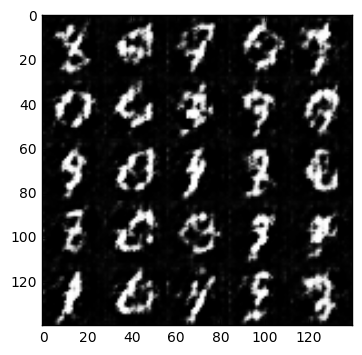

Epoch 1/2... Discriminator Loss: 1.2336... Generator Loss: 2.6019
Epoch 1/2... Discriminator Loss: 0.7165... Generator Loss: 1.1860
Epoch 1/2... Discriminator Loss: 0.7156... Generator Loss: 1.3845
Epoch 1/2... Discriminator Loss: 1.5638... Generator Loss: 2.2380
Epoch 1/2... Discriminator Loss: 1.0202... Generator Loss: 2.0148
Epoch 1/2... Discriminator Loss: 0.8517... Generator Loss: 1.1242
Epoch 1/2... Discriminator Loss: 0.8814... Generator Loss: 1.0817
Epoch 1/2... Discriminator Loss: 0.9270... Generator Loss: 1.0763
Epoch 1/2... Discriminator Loss: 0.8887... Generator Loss: 2.2332
Epoch 1/2... Discriminator Loss: 0.9535... Generator Loss: 0.8515


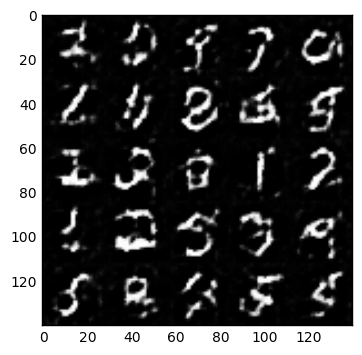

Epoch 1/2... Discriminator Loss: 1.1159... Generator Loss: 1.0262
Epoch 1/2... Discriminator Loss: 1.1109... Generator Loss: 0.8283
Epoch 1/2... Discriminator Loss: 1.0934... Generator Loss: 0.7099
Epoch 1/2... Discriminator Loss: 1.0477... Generator Loss: 0.7281
Epoch 1/2... Discriminator Loss: 1.4724... Generator Loss: 0.3842
Epoch 1/2... Discriminator Loss: 1.1660... Generator Loss: 0.5819
Epoch 2/2... Discriminator Loss: 1.0005... Generator Loss: 0.8545
Epoch 2/2... Discriminator Loss: 1.0278... Generator Loss: 0.9907
Epoch 2/2... Discriminator Loss: 0.9894... Generator Loss: 0.8119
Epoch 2/2... Discriminator Loss: 1.0270... Generator Loss: 0.9258


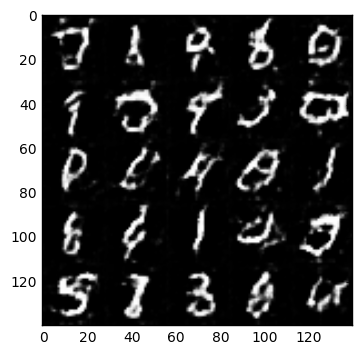

Epoch 2/2... Discriminator Loss: 1.2429... Generator Loss: 0.4913
Epoch 2/2... Discriminator Loss: 1.1762... Generator Loss: 0.5336
Epoch 2/2... Discriminator Loss: 1.1501... Generator Loss: 0.5889
Epoch 2/2... Discriminator Loss: 0.9900... Generator Loss: 0.8909
Epoch 2/2... Discriminator Loss: 1.1078... Generator Loss: 1.3098
Epoch 2/2... Discriminator Loss: 1.1779... Generator Loss: 1.4561
Epoch 2/2... Discriminator Loss: 1.1444... Generator Loss: 0.6158
Epoch 2/2... Discriminator Loss: 0.9598... Generator Loss: 0.9697
Epoch 2/2... Discriminator Loss: 1.1510... Generator Loss: 0.6291
Epoch 2/2... Discriminator Loss: 1.2449... Generator Loss: 0.5022


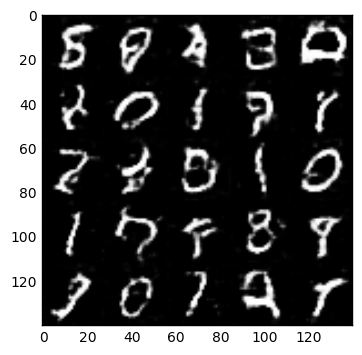

Epoch 2/2... Discriminator Loss: 1.1510... Generator Loss: 1.4425
Epoch 2/2... Discriminator Loss: 1.0784... Generator Loss: 1.0496
Epoch 2/2... Discriminator Loss: 1.4120... Generator Loss: 1.9822
Epoch 2/2... Discriminator Loss: 1.0479... Generator Loss: 0.8343
Epoch 2/2... Discriminator Loss: 1.0573... Generator Loss: 0.6900
Epoch 2/2... Discriminator Loss: 1.8719... Generator Loss: 2.4886
Epoch 2/2... Discriminator Loss: 1.0143... Generator Loss: 0.9346
Epoch 2/2... Discriminator Loss: 1.1226... Generator Loss: 0.9948
Epoch 2/2... Discriminator Loss: 0.9066... Generator Loss: 0.9515
Epoch 2/2... Discriminator Loss: 1.0350... Generator Loss: 0.7612


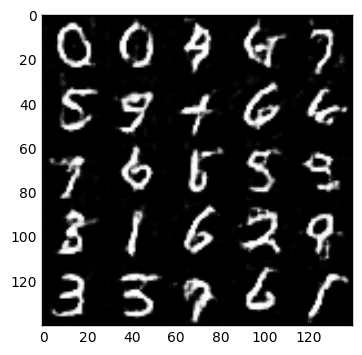

Epoch 2/2... Discriminator Loss: 1.0554... Generator Loss: 0.7191
Epoch 2/2... Discriminator Loss: 1.0170... Generator Loss: 0.9603
Epoch 2/2... Discriminator Loss: 1.0555... Generator Loss: 1.4130
Epoch 2/2... Discriminator Loss: 1.2823... Generator Loss: 0.4679
Epoch 2/2... Discriminator Loss: 1.0739... Generator Loss: 0.8908
Epoch 2/2... Discriminator Loss: 1.0561... Generator Loss: 1.1535
Epoch 2/2... Discriminator Loss: 1.1344... Generator Loss: 0.8947
Epoch 2/2... Discriminator Loss: 0.9887... Generator Loss: 1.2597
Epoch 2/2... Discriminator Loss: 2.0096... Generator Loss: 1.7949
Epoch 2/2... Discriminator Loss: 1.1678... Generator Loss: 0.9933


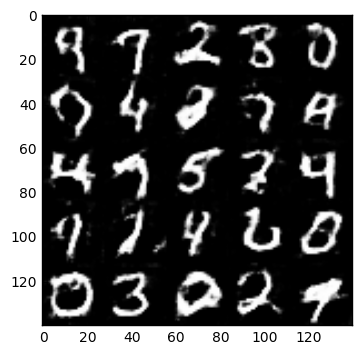

Epoch 2/2... Discriminator Loss: 1.1731... Generator Loss: 0.8317
Epoch 2/2... Discriminator Loss: 1.0012... Generator Loss: 1.1039
Epoch 2/2... Discriminator Loss: 0.8744... Generator Loss: 1.0812
Epoch 2/2... Discriminator Loss: 0.9452... Generator Loss: 1.1815
Epoch 2/2... Discriminator Loss: 1.0030... Generator Loss: 1.0564
Epoch 2/2... Discriminator Loss: 1.0223... Generator Loss: 0.9103
Epoch 2/2... Discriminator Loss: 2.6562... Generator Loss: 3.4891
Epoch 2/2... Discriminator Loss: 1.0994... Generator Loss: 1.2784
Epoch 2/2... Discriminator Loss: 0.9767... Generator Loss: 1.0980
Epoch 2/2... Discriminator Loss: 1.3076... Generator Loss: 0.5110


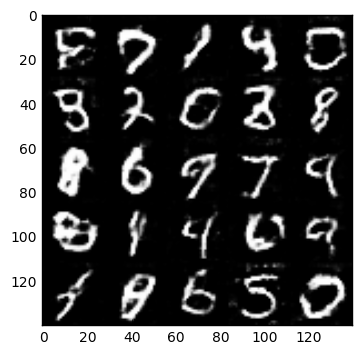

Epoch 2/2... Discriminator Loss: 1.1616... Generator Loss: 0.8137
Epoch 2/2... Discriminator Loss: 0.9842... Generator Loss: 1.2385
Epoch 2/2... Discriminator Loss: 1.1016... Generator Loss: 0.6432


In [29]:
batch_size = 128
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

#mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.chrome-extension://gfjopfpjmkcfgjpogepmdjmcnihfpokn/img/icons/icon-play_128.pngjpg')))
mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.2333... Generator Loss: 3.8987
Epoch 1/1... Discriminator Loss: 1.9798... Generator Loss: 0.8560
Epoch 1/1... Discriminator Loss: 0.5678... Generator Loss: 6.2090
Epoch 1/1... Discriminator Loss: 3.1302... Generator Loss: 0.2220
Epoch 1/1... Discriminator Loss: 1.6476... Generator Loss: 0.5428
Epoch 1/1... Discriminator Loss: 1.1784... Generator Loss: 1.2290
Epoch 1/1... Discriminator Loss: 0.9456... Generator Loss: 1.4815
Epoch 1/1... Discriminator Loss: 1.5499... Generator Loss: 1.6830
Epoch 1/1... Discriminator Loss: 1.3969... Generator Loss: 1.3704
Epoch 1/1... Discriminator Loss: 1.5726... Generator Loss: 0.8669


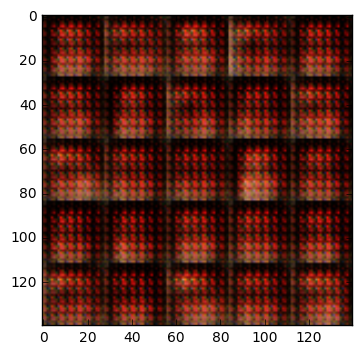

Epoch 1/1... Discriminator Loss: 0.9997... Generator Loss: 0.8426
Epoch 1/1... Discriminator Loss: 1.2222... Generator Loss: 1.3233
Epoch 1/1... Discriminator Loss: 1.3861... Generator Loss: 1.1483
Epoch 1/1... Discriminator Loss: 1.5608... Generator Loss: 0.5108
Epoch 1/1... Discriminator Loss: 1.6309... Generator Loss: 0.5583
Epoch 1/1... Discriminator Loss: 1.8922... Generator Loss: 2.5073
Epoch 1/1... Discriminator Loss: 1.1641... Generator Loss: 0.6091
Epoch 1/1... Discriminator Loss: 1.3141... Generator Loss: 0.5555
Epoch 1/1... Discriminator Loss: 1.2534... Generator Loss: 0.7291
Epoch 1/1... Discriminator Loss: 1.0742... Generator Loss: 0.9597


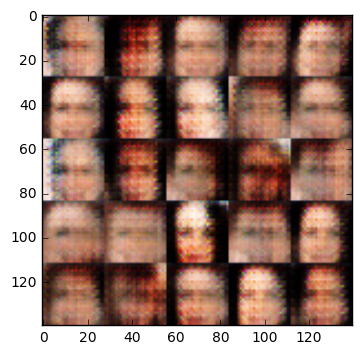

Epoch 1/1... Discriminator Loss: 1.1580... Generator Loss: 0.8508
Epoch 1/1... Discriminator Loss: 1.6878... Generator Loss: 0.3370
Epoch 1/1... Discriminator Loss: 1.3920... Generator Loss: 1.6805
Epoch 1/1... Discriminator Loss: 1.4360... Generator Loss: 1.8405
Epoch 1/1... Discriminator Loss: 1.3877... Generator Loss: 0.4793
Epoch 1/1... Discriminator Loss: 1.3929... Generator Loss: 0.6314
Epoch 1/1... Discriminator Loss: 1.2177... Generator Loss: 1.3106
Epoch 1/1... Discriminator Loss: 1.2437... Generator Loss: 0.7828
Epoch 1/1... Discriminator Loss: 1.2246... Generator Loss: 0.8244
Epoch 1/1... Discriminator Loss: 1.0124... Generator Loss: 1.2027


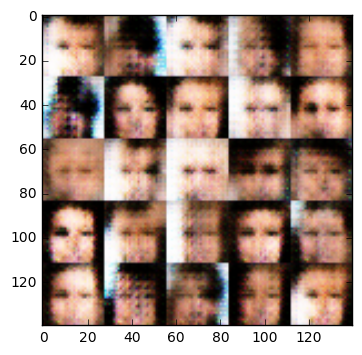

Epoch 1/1... Discriminator Loss: 0.8928... Generator Loss: 1.0869
Epoch 1/1... Discriminator Loss: 1.1001... Generator Loss: 1.1327
Epoch 1/1... Discriminator Loss: 1.1765... Generator Loss: 0.9436
Epoch 1/1... Discriminator Loss: 0.9682... Generator Loss: 0.8033
Epoch 1/1... Discriminator Loss: 1.1359... Generator Loss: 1.3421
Epoch 1/1... Discriminator Loss: 1.3008... Generator Loss: 1.1703
Epoch 1/1... Discriminator Loss: 0.9635... Generator Loss: 1.0094
Epoch 1/1... Discriminator Loss: 1.4078... Generator Loss: 0.6787
Epoch 1/1... Discriminator Loss: 1.0359... Generator Loss: 1.1679
Epoch 1/1... Discriminator Loss: 1.0534... Generator Loss: 1.1220


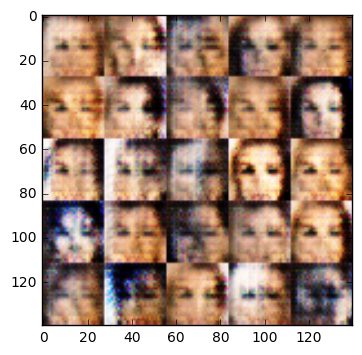

Epoch 1/1... Discriminator Loss: 0.8492... Generator Loss: 1.5315
Epoch 1/1... Discriminator Loss: 1.0573... Generator Loss: 0.6748
Epoch 1/1... Discriminator Loss: 1.5735... Generator Loss: 0.3881
Epoch 1/1... Discriminator Loss: 0.8926... Generator Loss: 1.4061
Epoch 1/1... Discriminator Loss: 1.1724... Generator Loss: 0.8981
Epoch 1/1... Discriminator Loss: 1.0206... Generator Loss: 1.1599
Epoch 1/1... Discriminator Loss: 0.8666... Generator Loss: 1.3666
Epoch 1/1... Discriminator Loss: 1.7412... Generator Loss: 0.4234
Epoch 1/1... Discriminator Loss: 1.4238... Generator Loss: 0.5781
Epoch 1/1... Discriminator Loss: 1.3544... Generator Loss: 1.9902


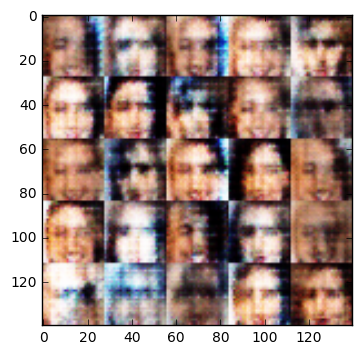

Epoch 1/1... Discriminator Loss: 2.0321... Generator Loss: 2.4045
Epoch 1/1... Discriminator Loss: 1.0915... Generator Loss: 1.6519
Epoch 1/1... Discriminator Loss: 1.0566... Generator Loss: 1.1954
Epoch 1/1... Discriminator Loss: 1.6132... Generator Loss: 2.0031
Epoch 1/1... Discriminator Loss: 1.1615... Generator Loss: 2.0903
Epoch 1/1... Discriminator Loss: 1.2319... Generator Loss: 0.6535
Epoch 1/1... Discriminator Loss: 1.3091... Generator Loss: 1.9116
Epoch 1/1... Discriminator Loss: 1.1585... Generator Loss: 1.4653
Epoch 1/1... Discriminator Loss: 0.9770... Generator Loss: 0.8764
Epoch 1/1... Discriminator Loss: 0.9140... Generator Loss: 0.9998


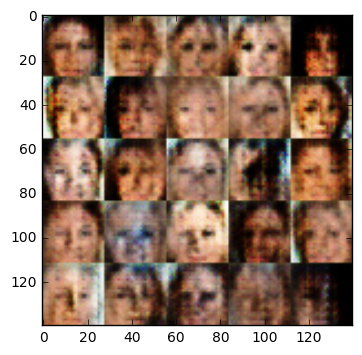

Epoch 1/1... Discriminator Loss: 1.0056... Generator Loss: 0.9626
Epoch 1/1... Discriminator Loss: 1.0338... Generator Loss: 1.0794
Epoch 1/1... Discriminator Loss: 1.2972... Generator Loss: 0.6309
Epoch 1/1... Discriminator Loss: 1.4328... Generator Loss: 0.4019
Epoch 1/1... Discriminator Loss: 1.5866... Generator Loss: 0.3455
Epoch 1/1... Discriminator Loss: 1.0541... Generator Loss: 0.8569
Epoch 1/1... Discriminator Loss: 1.2909... Generator Loss: 2.6819
Epoch 1/1... Discriminator Loss: 1.4716... Generator Loss: 0.4418
Epoch 1/1... Discriminator Loss: 0.8229... Generator Loss: 1.2720
Epoch 1/1... Discriminator Loss: 1.2451... Generator Loss: 1.7573


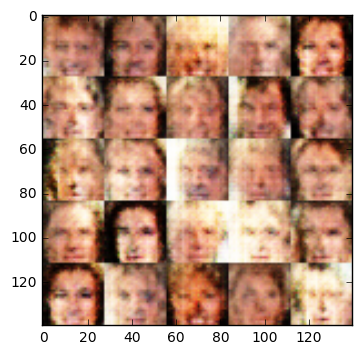

Epoch 1/1... Discriminator Loss: 1.0913... Generator Loss: 0.9624
Epoch 1/1... Discriminator Loss: 1.3016... Generator Loss: 0.6646
Epoch 1/1... Discriminator Loss: 0.9791... Generator Loss: 1.0690
Epoch 1/1... Discriminator Loss: 1.3011... Generator Loss: 0.4735
Epoch 1/1... Discriminator Loss: 1.0656... Generator Loss: 1.4234
Epoch 1/1... Discriminator Loss: 1.1644... Generator Loss: 1.0994
Epoch 1/1... Discriminator Loss: 0.9958... Generator Loss: 1.0273
Epoch 1/1... Discriminator Loss: 1.1316... Generator Loss: 0.7120
Epoch 1/1... Discriminator Loss: 1.0491... Generator Loss: 0.9860
Epoch 1/1... Discriminator Loss: 1.3358... Generator Loss: 0.4915


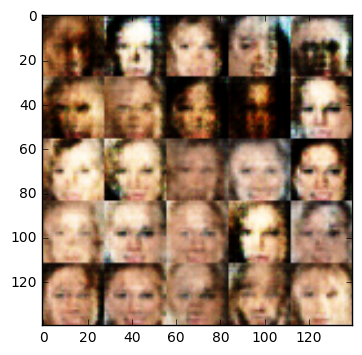

Epoch 1/1... Discriminator Loss: 1.0434... Generator Loss: 1.3028
Epoch 1/1... Discriminator Loss: 2.2952... Generator Loss: 3.3408
Epoch 1/1... Discriminator Loss: 1.0281... Generator Loss: 1.2267
Epoch 1/1... Discriminator Loss: 1.0538... Generator Loss: 0.7784
Epoch 1/1... Discriminator Loss: 1.4283... Generator Loss: 2.3315
Epoch 1/1... Discriminator Loss: 1.2737... Generator Loss: 0.6580
Epoch 1/1... Discriminator Loss: 1.0532... Generator Loss: 1.1869
Epoch 1/1... Discriminator Loss: 1.3064... Generator Loss: 0.9419
Epoch 1/1... Discriminator Loss: 1.4143... Generator Loss: 0.4290
Epoch 1/1... Discriminator Loss: 1.0230... Generator Loss: 1.0736


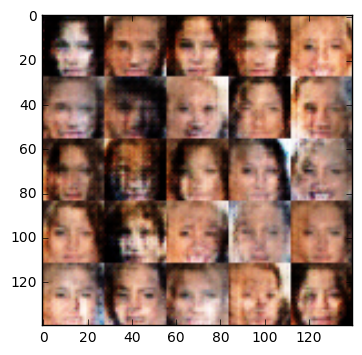

Epoch 1/1... Discriminator Loss: 1.5991... Generator Loss: 0.4687
Epoch 1/1... Discriminator Loss: 1.2385... Generator Loss: 0.9066
Epoch 1/1... Discriminator Loss: 0.7955... Generator Loss: 1.1283
Epoch 1/1... Discriminator Loss: 1.1105... Generator Loss: 1.0158
Epoch 1/1... Discriminator Loss: 1.1017... Generator Loss: 1.1691
Epoch 1/1... Discriminator Loss: 1.0962... Generator Loss: 0.9092
Epoch 1/1... Discriminator Loss: 1.2364... Generator Loss: 0.6050
Epoch 1/1... Discriminator Loss: 1.8261... Generator Loss: 0.2722
Epoch 1/1... Discriminator Loss: 1.1556... Generator Loss: 1.3360
Epoch 1/1... Discriminator Loss: 1.2890... Generator Loss: 0.5347


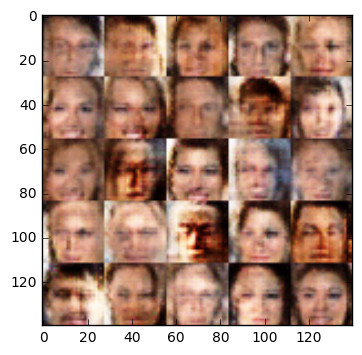

Epoch 1/1... Discriminator Loss: 1.1578... Generator Loss: 0.6876
Epoch 1/1... Discriminator Loss: 1.2803... Generator Loss: 1.8343
Epoch 1/1... Discriminator Loss: 1.1253... Generator Loss: 0.9856
Epoch 1/1... Discriminator Loss: 1.0133... Generator Loss: 1.7028
Epoch 1/1... Discriminator Loss: 1.0598... Generator Loss: 0.9110
Epoch 1/1... Discriminator Loss: 1.3829... Generator Loss: 0.4831
Epoch 1/1... Discriminator Loss: 1.2432... Generator Loss: 1.8340
Epoch 1/1... Discriminator Loss: 1.1901... Generator Loss: 0.8594
Epoch 1/1... Discriminator Loss: 0.9629... Generator Loss: 1.0589
Epoch 1/1... Discriminator Loss: 1.1213... Generator Loss: 1.2960


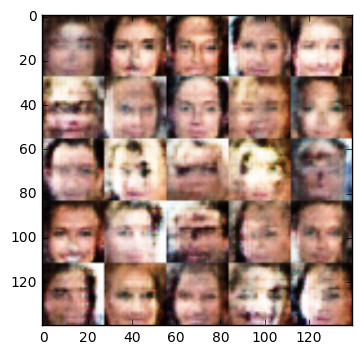

Epoch 1/1... Discriminator Loss: 1.1560... Generator Loss: 1.0110
Epoch 1/1... Discriminator Loss: 1.2308... Generator Loss: 1.5833
Epoch 1/1... Discriminator Loss: 1.4647... Generator Loss: 0.4255
Epoch 1/1... Discriminator Loss: 1.0041... Generator Loss: 0.9978
Epoch 1/1... Discriminator Loss: 1.0975... Generator Loss: 1.3710
Epoch 1/1... Discriminator Loss: 1.0646... Generator Loss: 1.1757
Epoch 1/1... Discriminator Loss: 1.1218... Generator Loss: 0.7147
Epoch 1/1... Discriminator Loss: 1.1948... Generator Loss: 0.6137
Epoch 1/1... Discriminator Loss: 0.9125... Generator Loss: 1.7565
Epoch 1/1... Discriminator Loss: 1.1842... Generator Loss: 1.0197


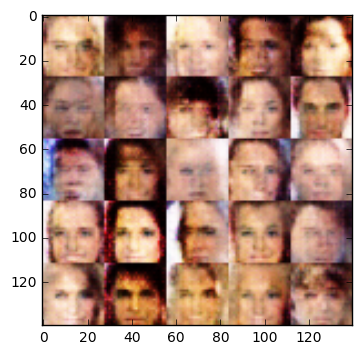

Epoch 1/1... Discriminator Loss: 1.0925... Generator Loss: 0.7893
Epoch 1/1... Discriminator Loss: 1.1121... Generator Loss: 1.3580
Epoch 1/1... Discriminator Loss: 0.9404... Generator Loss: 1.1400
Epoch 1/1... Discriminator Loss: 0.9869... Generator Loss: 1.2135
Epoch 1/1... Discriminator Loss: 1.1566... Generator Loss: 1.0440
Epoch 1/1... Discriminator Loss: 1.4374... Generator Loss: 0.4836
Epoch 1/1... Discriminator Loss: 1.0203... Generator Loss: 0.8278
Epoch 1/1... Discriminator Loss: 1.3341... Generator Loss: 0.5082
Epoch 1/1... Discriminator Loss: 0.9781... Generator Loss: 1.2080
Epoch 1/1... Discriminator Loss: 1.2456... Generator Loss: 0.9885


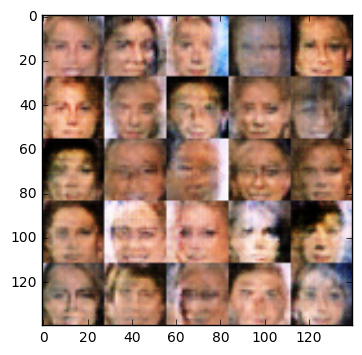

Epoch 1/1... Discriminator Loss: 1.2885... Generator Loss: 1.8884
Epoch 1/1... Discriminator Loss: 1.2240... Generator Loss: 0.6120
Epoch 1/1... Discriminator Loss: 1.0977... Generator Loss: 1.0930
Epoch 1/1... Discriminator Loss: 1.0400... Generator Loss: 1.0134
Epoch 1/1... Discriminator Loss: 1.0641... Generator Loss: 1.0370
Epoch 1/1... Discriminator Loss: 0.9862... Generator Loss: 1.3977
Epoch 1/1... Discriminator Loss: 1.1990... Generator Loss: 1.9992
Epoch 1/1... Discriminator Loss: 1.2820... Generator Loss: 1.3664
Epoch 1/1... Discriminator Loss: 1.2608... Generator Loss: 0.5670
Epoch 1/1... Discriminator Loss: 1.1328... Generator Loss: 0.9316


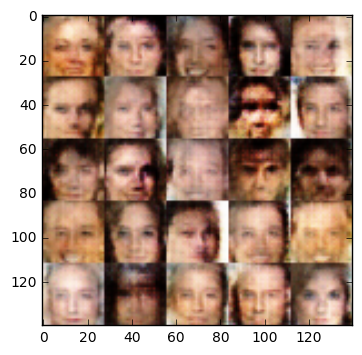

Epoch 1/1... Discriminator Loss: 1.1318... Generator Loss: 0.8506
Epoch 1/1... Discriminator Loss: 1.2430... Generator Loss: 0.8773
Epoch 1/1... Discriminator Loss: 1.1801... Generator Loss: 0.7425
Epoch 1/1... Discriminator Loss: 0.9653... Generator Loss: 0.9105
Epoch 1/1... Discriminator Loss: 1.1532... Generator Loss: 0.9973
Epoch 1/1... Discriminator Loss: 1.0094... Generator Loss: 1.5428
Epoch 1/1... Discriminator Loss: 1.2203... Generator Loss: 1.1775
Epoch 1/1... Discriminator Loss: 1.2234... Generator Loss: 0.5952
Epoch 1/1... Discriminator Loss: 0.9863... Generator Loss: 1.0541
Epoch 1/1... Discriminator Loss: 1.1481... Generator Loss: 0.9619


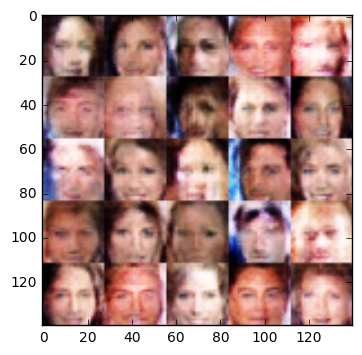

Epoch 1/1... Discriminator Loss: 1.1516... Generator Loss: 0.7129
Epoch 1/1... Discriminator Loss: 1.3640... Generator Loss: 0.5639
Epoch 1/1... Discriminator Loss: 1.2832... Generator Loss: 0.9383
Epoch 1/1... Discriminator Loss: 1.1673... Generator Loss: 1.2345
Epoch 1/1... Discriminator Loss: 1.5191... Generator Loss: 0.3787
Epoch 1/1... Discriminator Loss: 1.1614... Generator Loss: 1.6524
Epoch 1/1... Discriminator Loss: 1.3581... Generator Loss: 0.4702
Epoch 1/1... Discriminator Loss: 1.2759... Generator Loss: 0.5678


In [30]:
batch_size = 128
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.